In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv
/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv


In [2]:
train=pd.read_csv('../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')
test=pd.read_csv('/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
def tdrop(x):
    x.drop("Loan_ID",axis=1,inplace=True)

In [5]:
tdrop(train)

In [6]:
d={"Loan_Status":{'N':0.0,'Y':1.0}}
train.replace(d,inplace=True)

In [7]:
label=train["Loan_Status"].values
train.drop(["Loan_Status"],axis=1,inplace=True)

In [8]:
import numpy as np
def missvalue(a):
    l=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']
    for i in l:
        if a[i].dtypes!='O':
            med=a[i].median()
            a[i].fillna(med,inplace=True)
        else:
            m=a[i].value_counts().index[0]
            a[i].fillna(m,inplace=True) 

In [9]:
missvalue(train)

In [10]:
def split(a):
    num=a.select_dtypes(include=[np.number]) 
    cat=a.select_dtypes(exclude=[np.number])
    cat=pd.get_dummies(cat)
    return num,cat
    

In [11]:
x,y=split(train)

In [12]:
x.columns.value_counts().sum()

5

In [13]:
y.columns.value_counts().sum()

15

In [14]:
x.insert(5,"Loan_Status",label,True)
y.insert(15,"Loan_Status",label,True)

In [15]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,128.0,360.0,1.0,1.0
1,4583,1508.0,128.0,360.0,1.0,0.0
2,3000,0.0,66.0,360.0,1.0,1.0
3,2583,2358.0,120.0,360.0,1.0,1.0
4,6000,0.0,141.0,360.0,1.0,1.0


In [16]:
correlation=x.corr()

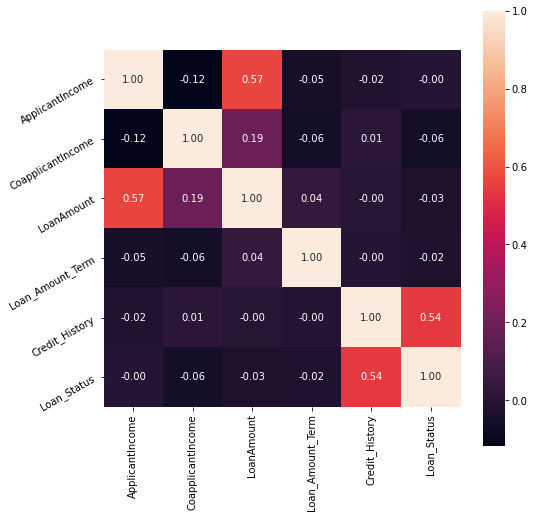

In [17]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [18]:
correlation=y.corr()

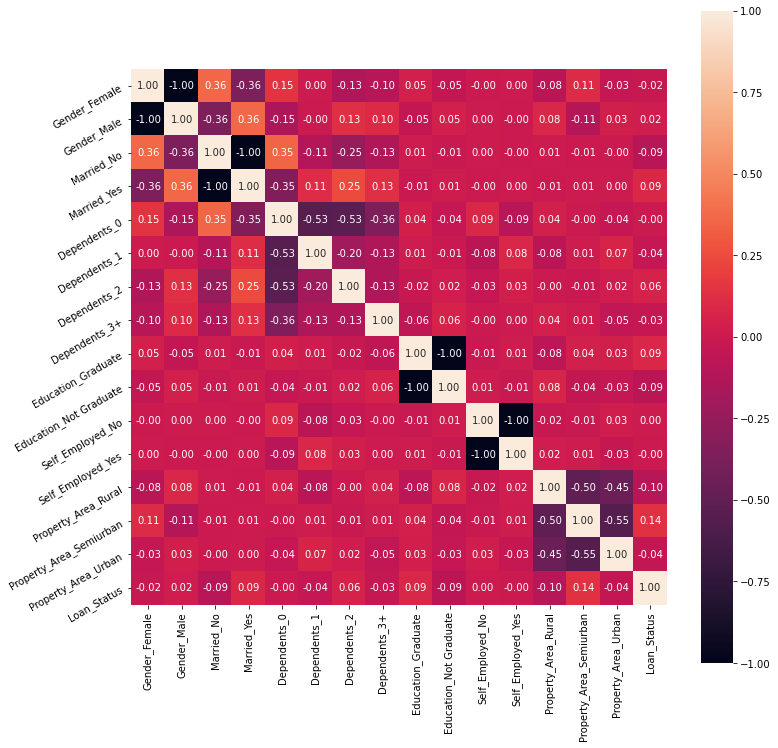

In [19]:
plt.figure(figsize=(12,12))
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [20]:
def fdrop(m,n):
    m.drop(["ApplicantIncome"],axis=1,inplace=True)
    n.drop(["Self_Employed_No"],axis=1,inplace=True)
    n.drop(["Dependents_0"],axis=1,inplace=True)
    n.drop(["Self_Employed_Yes"],axis=1,inplace=True) 
    return m,n

In [21]:
x,y=fdrop(x,y)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
x.drop(["Loan_Status"],axis=1,inplace=True)

In [23]:
y.drop(["Loan_Status"],axis=1,inplace=True)

In [24]:
scaler=StandardScaler()
def scaling(x,y):
     features_scaled=scaler.fit_transform(x.values)
     q=y.values
     vk=np.concatenate((q,features_scaled),axis=1)
     return vk

In [25]:
features=scaling(x,y)

In [26]:
numpy.random.seed(1234)
(x_train,x_test,y_train,y_test) = train_test_split(features,label, train_size=0.75, random_state=42)

In [27]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C)

In [28]:
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [29]:
y_pred =svc.predict(x_test)

In [30]:
accuracy_score(y_test,y_pred)

0.7727272727272727

In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[21 33]
 [ 2 98]]


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.39      0.55        54
         1.0       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



In [33]:
svc = svm.SVC(kernel='rbf', C=C)

In [34]:
svc.fit(x_train, y_train)

SVC()

In [35]:
y_pred =svc.predict(x_test)

In [36]:
accuracy_score(y_test, y_pred)

0.7857142857142857

In [37]:
cm = confusion_matrix(y_test, y_pred)

In [38]:
print(cm)

[[22 32]
 [ 1 99]]


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.41      0.57        54
         1.0       0.76      0.99      0.86       100

    accuracy                           0.79       154
   macro avg       0.86      0.70      0.71       154
weighted avg       0.83      0.79      0.76       154



In [40]:
clf= DecisionTreeClassifier(random_state=1)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [41]:
y_pred=clf.predict(x_test)

In [42]:
accuracy_score(y_test, y_pred)

0.6623376623376623

In [43]:
cm = confusion_matrix(y_test, y_pred)

In [44]:
print(cm)

[[28 26]
 [26 74]]


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.52      0.52      0.52        54
         1.0       0.74      0.74      0.74       100

    accuracy                           0.66       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.66      0.66      0.66       154



In [46]:
clf = RandomForestClassifier(n_estimators=10, random_state=1)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [47]:
y_pred=clf.predict(x_test)

In [48]:
accuracy_score(y_test, y_pred)

0.7597402597402597

In [49]:
cm = confusion_matrix(y_test, y_pred)

In [50]:
print(cm)

[[27 27]
 [10 90]]


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.50      0.59        54
         1.0       0.77      0.90      0.83       100

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.71       154
weighted avg       0.76      0.76      0.75       154



In [52]:
clf = neighbors.KNeighborsClassifier(n_neighbors=10)
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [53]:
y_pred=clf.predict(x_test)

In [54]:
accuracy_score(y_test, y_pred)

0.7662337662337663

In [55]:
cm = confusion_matrix(y_test, y_pred)

In [56]:
print(cm)

[[23 31]
 [ 5 95]]


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.43      0.56        54
         1.0       0.75      0.95      0.84       100

    accuracy                           0.77       154
   macro avg       0.79      0.69      0.70       154
weighted avg       0.78      0.77      0.74       154



In [58]:
tdrop(test)

In [59]:
missvalue(test)

In [60]:
x,y=split(test)

In [61]:
x,y=fdrop(x,y)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
features=scaling(x,y)

In [63]:
features

array([[ 0.        ,  1.        ,  0.        , ..., -0.42677996,
         0.26602207,  0.4376739 ],
       [ 0.        ,  1.        ,  0.        , ..., -0.16395333,
         0.26602207,  0.4376739 ],
       [ 0.        ,  1.        ,  0.        , ...,  1.18303317,
         0.26602207,  0.4376739 ],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -0.16395333,
         0.26602207,  0.4376739 ],
       [ 0.        ,  1.        ,  0.        , ...,  0.36169994,
         0.26602207,  0.4376739 ],
       [ 0.        ,  1.        ,  1.        , ..., -0.62389994,
        -2.52163936,  0.4376739 ]])

In [64]:
svc = svm.SVC(kernel='rbf', C=C)

In [65]:
svc.fit(x_train,y_train)

SVC()

In [66]:
y_pred=svc.predict(features)

In [67]:
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.